In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import missingno as msno
from IPython.display import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor
import pydotplus
from six import StringIO
from IPython.display import display
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import f1_score,classification_report,accuracy_score, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score, RepeatedKFold

In [17]:
df = pd.read_csv('datasets/Position_Salaries.csv')

In [18]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


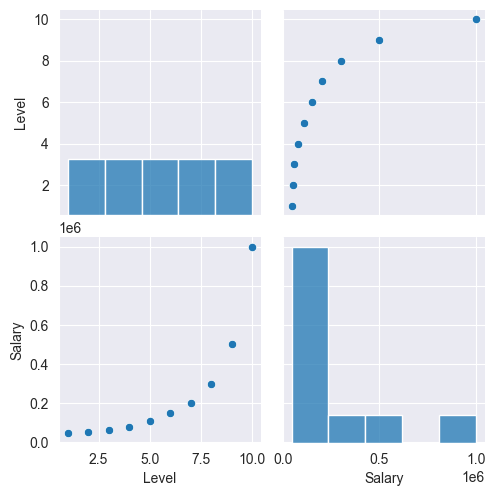

In [19]:
sns.pairplot(df)

In [20]:
df2 = pd.read_csv('datasets/50_Startups.csv')

In [21]:
df2

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [22]:
df2.drop(columns=['State', 'Administration']) #ne ni se potrebni

,R&D Spend,Marketing Spend,Profit
0,165349.20,471784.10,192261.83
1,162597.70,443898.53,191792.06
2,153441.51,407934.54,191050.39
3,144372.41,383199.62,182901.99
4,142107.34,366168.42,166187.94
5,131876.90,362861.36,156991.12
6,134615.46,127716.82,156122.51
7,130298.13,323876.68,155752.60
8,120542.52,311613.29,152211.77
9,123334.88,304981.62,149759.96


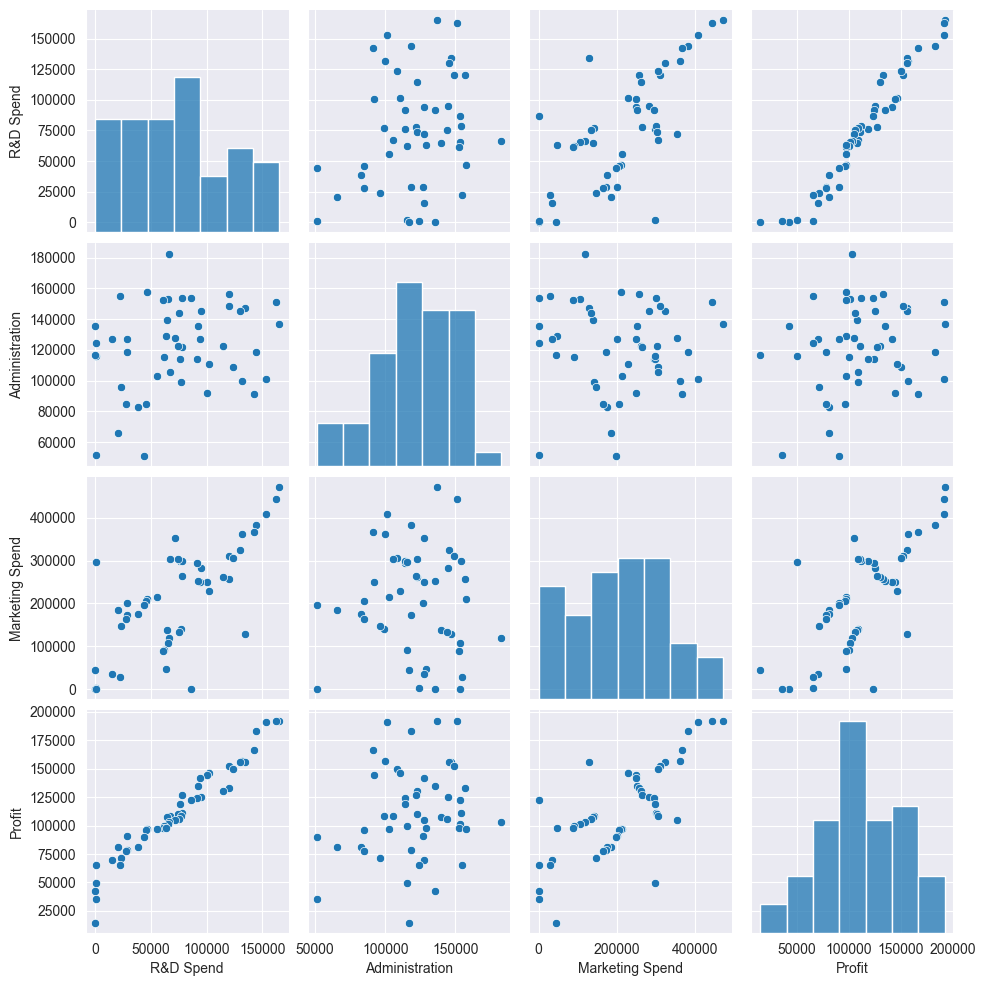

In [23]:
sns.pairplot(df2)

In [24]:
x = df['Level']
y = df['Salary']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [26]:
x

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: Level, dtype: int64

In [27]:
x_train = x_train.values.reshape(-1,1)

In [28]:
tree = DecisionTreeClassifier()

tree.fit(x_train, y_train)

DecisionTreeClassifier()

# Decision Tree za 2ta modeli oddelno

In [29]:
tree_regression = DecisionTreeRegressor()

tree_regression.fit(x_train, y_train)

DecisionTreeRegressor()

In [30]:
x_test = x_test.values.reshape(-1,1)

In [31]:
y_pred = tree_regression.predict(x_test)

In [32]:
r2_score(y_test, y_pred)

0.6046913580246913

In [33]:
df2 = df2.drop(columns=['State', 'Administration'])

In [34]:
df2

,R&D Spend,Marketing Spend,Profit
0,165349.20,471784.10,192261.83
1,162597.70,443898.53,191792.06
2,153441.51,407934.54,191050.39
3,144372.41,383199.62,182901.99
4,142107.34,366168.42,166187.94
5,131876.90,362861.36,156991.12
6,134615.46,127716.82,156122.51
7,130298.13,323876.68,155752.60
8,120542.52,311613.29,152211.77
9,123334.88,304981.62,149759.96


In [35]:
x2 = df2[df2.columns[:-1]]
y2 = df2['Profit']

In [36]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2)

In [37]:
tree_regression2 = DecisionTreeRegressor()

tree_regression2.fit(x_train2, y_train2)

DecisionTreeRegressor()

In [38]:
y_pred2 = tree_regression2.predict(x_test2)

In [39]:
y_test2

10    146121.95
46     49490.75
4     166187.94
41     77798.83
28    103282.38
17    125370.37
39     81005.76
35     96479.51
1     191792.06
42     71498.49
Name: Profit, dtype: float64

In [40]:
r2_score(y_test2, y_pred2) #poveke podatoci imame, podobar DecisionTree

0.8867168908576841